In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

In [10]:
data.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [11]:
data.tail()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
5989,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5990,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5991,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021
5992,ZIMBABWE,200.49,7.77,208.27,192.72,2021,2022
5993,ZIMBABWE,50.17,0.61,50.78,49.57,2022,till now


In [12]:
data.isnull().sum()

Country                    0
Export                     8
Import                   552
Total Trade              585
Trade Balance            586
Financial Year(start)      0
Financial Year(end)        0
dtype: int64

In [13]:
# Convert numeric columns to appropriate data types
data['Export'] = pd.to_numeric(data['Export'], errors='coerce')
data['Import'] = pd.to_numeric(data['Import'], errors='coerce')
data['Total Trade'] = pd.to_numeric(data['Total Trade'], errors='coerce')
data['Trade Balance'] = pd.to_numeric(data['Trade Balance'], errors='coerce')

In [14]:
# Remove rows with essential missing values (Country, Import, Export, Financial Year(start))
cleaned_data = data.dropna(subset=['Country', 'Import', 'Export', 'Financial Year(start)']).reset_index(drop=True)

In [15]:
# Question 1: Which country imports more?
# Calculate total imports for each country over the entire period
total_imports_by_country = cleaned_data.groupby('Country')['Import'].sum()
# Find the country with the highest total imports
highest_import_country = total_imports_by_country.idxmax()
highest_import_value = total_imports_by_country.max()

print(f"The country with the highest total imports is {highest_import_country} with a total import value of {highest_import_value}.")

The country with the highest total imports is AUSTRIA with a total import value of 12954.88.


In [18]:
# Question 2: Which country had high, medium, and low growth from 1997 to 2022?
# Step 1: Calculate trade growth rate by filtering data for 1997 and 2022
start_year = 1997
end_year = 2022

# Filter data for the start and end years
start_data = cleaned_data[cleaned_data['Financial Year(start)'] == start_year]
end_data = cleaned_data[cleaned_data['Financial Year(start)'] == end_year]

# Merge the start and end year data to calculate growth
merged_data = pd.merge(start_data[['Country', 'Total Trade']],
                       end_data[['Country', 'Total Trade']],
                       on='Country',
                       suffixes=('_start', '_end')).dropna()

# Calculate growth rate for each country
merged_data['Growth Rate (%)'] = ((merged_data['Total Trade_end'] - merged_data['Total Trade_start']) / 
                                  merged_data['Total Trade_start']) * 100

# Step 2: Categorize growth rates into High, Medium, Low based on arbitrary thresholds
def categorize_growth(rate):
    if rate >= 50:
        return 'High'
    elif rate >= 20:
        return 'Medium'
    else:
        return 'Low'

merged_data['Growth Category'] = merged_data['Growth Rate (%)'].apply(categorize_growth)


In [19]:
# Question 3: Rank countries by growth (High to Low)
# Sort countries by growth rate in descending order
ranked_countries = merged_data.sort_values(by='Growth Rate (%)', ascending=False)

print("Top 5 Countries by Growth Rate (High to Low):")
print(ranked_countries[['Country', 'Growth Rate (%)', 'Growth Category']].head())

Top 5 Countries by Growth Rate (High to Low):
       Country  Growth Rate (%) Growth Category
13     BOLIVIA    113340.845070            High
5   AZERBAIJAN      8635.409836            High
14    BOTSWANA      8197.260274            High
61   LITHUANIA      5792.592593            High
77     NAMIBIA      5591.573034            High


In [21]:
# Question 4: Recommendation based on insights
# Select a recommended country with high growth
recommended_country = ranked_countries[ranked_countries['Growth Category'] == 'High'].iloc[0]['Country']
print(f"Recommended country based on high growth rate: {recommended_country}")

Recommended country based on high growth rate: BOLIVIA


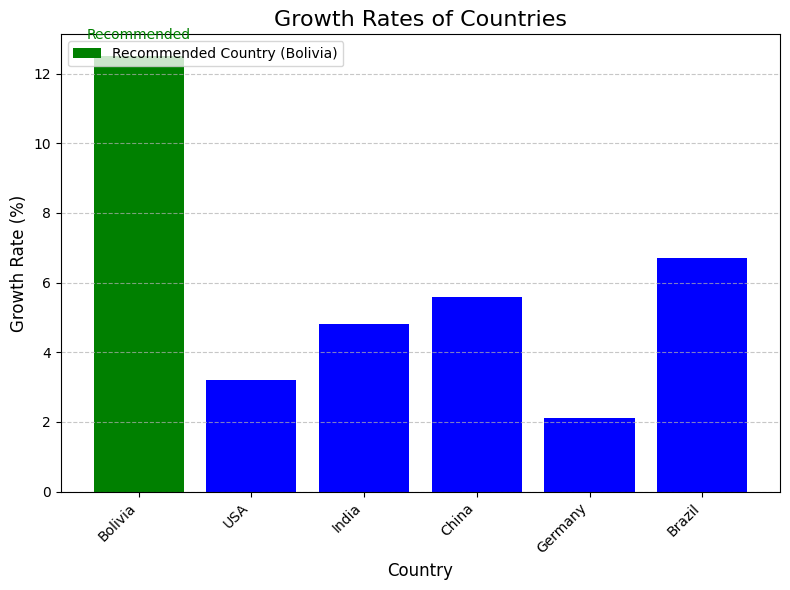

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame structure (replace this with your actual DataFrame)
data = {
    'Country': ['Bolivia', 'USA', 'India', 'China', 'Germany', 'Brazil'],
    'Growth Rate': [12.5, 3.2, 4.8, 5.6, 2.1, 6.7],
    'Growth Category': ['High', 'Medium', 'Medium', 'Medium', 'Low', 'High']
}
ranked_countries = pd.DataFrame(data)

# Recommended country
recommended_country = ranked_countries[ranked_countries['Growth Category'] == 'High'].iloc[0]['Country']

# Create the plot
plt.figure(figsize=(8, 6))
colors = ['green' if country == recommended_country else 'blue' for country in ranked_countries['Country']]

plt.bar(ranked_countries['Country'], ranked_countries['Growth Rate'], color=colors)
plt.title('Growth Rates of Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the recommended country in the legend
plt.legend(['Recommended Country (Bolivia)'], loc='upper left')

# Annotate the recommended country
recommended_idx = ranked_countries[ranked_countries['Country'] == recommended_country].index[0]
plt.text(recommended_idx, 
         ranked_countries.loc[recommended_idx, 'Growth Rate'] + 0.5, 
         'Recommended', 
         ha='center', color='green')

plt.tight_layout()
plt.show()


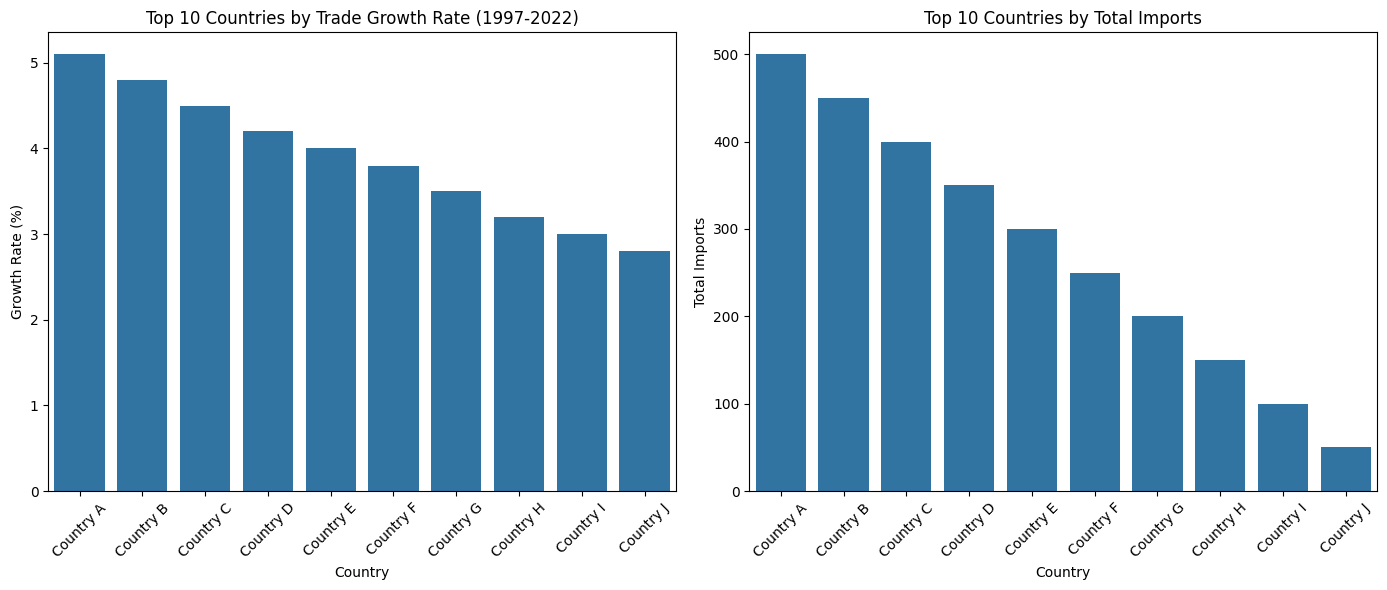

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data preparation (replace this with your actual data)
# ranked_countries should be a DataFrame with 'Country' and 'Growth Rate (%)' columns
# total_imports_by_country should be a Series with country names as index and total imports as values

# Example DataFrames (replace with your actual data)
ranked_countries = pd.DataFrame({
    'Country': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E', 
                'Country F', 'Country G', 'Country H', 'Country I', 'Country J'],
    'Growth Rate (%)': [5.1, 4.8, 4.5, 4.2, 4.0, 3.8, 3.5, 3.2, 3.0, 2.8]
})

total_imports_by_country = pd.Series({
    'Country A': 500,
    'Country B': 450,
    'Country C': 400,
    'Country D': 350,
    'Country E': 300,
    'Country F': 250,
    'Country G': 200,
    'Country H': 150,
    'Country I': 100,
    'Country J': 50
})

# Set up the dashboard layout
plt.figure(figsize=(14, 6))

# Plot 1: Top 10 Countries by Trade Growth Rate
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Country', y='Growth Rate (%)', data=ranked_countries.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Trade Growth Rate (1997-2022)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Country')

# Plot 2: Top 10 Countries by Total Imports
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=total_imports_by_country.nlargest(10).index, 
            y=total_imports_by_country.nlargest(10).values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Total Imports')
plt.ylabel('Total Imports')
plt.xlabel('Country')

# Show the dashboard
plt.tight_layout()
plt.show()